# Group Deku Project.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Royal car Dealers have a car yard.They mainly deal in selling new cars but want to make a shift to second hand dealership like other yards.Second hand cars have a huge market base.Many people consider buying used cars instead of a new ones due to their big difference in price points.There is a lack of information available to consumers about the relationship between used car prices and mileage. As a result, consumers may end uppaying more or less for a used car than it is actually worth, leading to financial losses or missed opportunities for savings. This problem disproportionately aects first-time car buyers or those with limited knowledge about the used car market.

> **Problem Statement:** The goal of this project is to predict the price of used cars given the feautures.

### b) Defining the Metric for Success

> Having a model that accurately  predicts used car prices.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [41]:
#importing relevant libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading the Data 
# ---
# Dataset url = https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
# ---
#
car_details_df = pd.read_csv("Car details v3.csv")
car_df = car_details_df.copy()
car_df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0




## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
car_df.shape

(8128, 13)

In [5]:
# Previewing the top of our dataset
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Previewing the bottom of our dataset
car_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
# Checking whether each column has an appropriate datatype
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [8]:
# Checking for Outliers
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
# Checking for Anomalies
#

In [10]:
# Identifying the Missing Data
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
# Dealing with the Missing Data
car_df.dropna(inplace=True)

In [12]:
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [13]:
# Identifying the Duplicated Data
car_df.duplicated().sum()

1189

In [14]:
car_df.drop_duplicates(inplace=True)

In [15]:
car_df.duplicated().sum()

0

In [16]:
# More data cleaning procedures
#creating a function that strips and converts non-numerical data types to numericals.
def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    car_df[col].replace(to_replace, value,inplace = True, regex = True)
replace_data(car_df, "CC", "", "engine")
car_df["engine"] = car_df["engine"].astype(float)

In [17]:
replace_data(car_df, "km/kg", "", "mileage")
replace_data(car_df, "kmpl", "", "mileage")
car_df["mileage"] = car_df["mileage"].astype(float)

In [18]:
replace_data(car_df, "bhp", "", "max_power")
car_df["max_power"] = car_df["max_power"].astype(float)

In [ ]:
import re

def findFirstFloat(string):
    return re.findall(r"[-+]?(?:\d*\.*\d+)", string)[0]

car_df["new_torque"] = car_df["torque"].apply(findFirstFloat)

In [19]:
numerical_col = ['mileage','year', 'max_power','km_driven', 'engine']

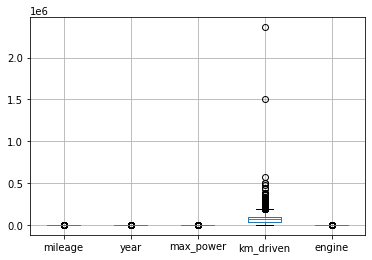

In [20]:
car_df.boxplot(numerical_col);

In [21]:
for x in ['km_driven']:
    q75,q25 = np.percentile(car_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    max= q75+(1.5*intr_qr)
    min= q25-(1.5*intr_qr)
    
    car_df.loc[car_df[x]  < min,x] = np.nan
    car_df.loc[car_df[x]  > max,x] = np.nan

In [22]:
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven        161
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque             0
seats              0
dtype: int64

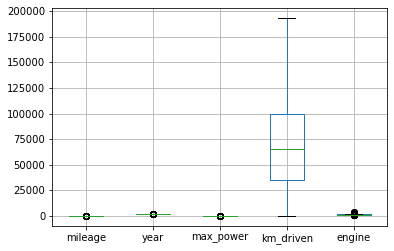

In [23]:
car_df.boxplot(numerical_col);

In [24]:
car_df = car_df.dropna(axis=0)

In [25]:
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## 6. Exploratory Analysis

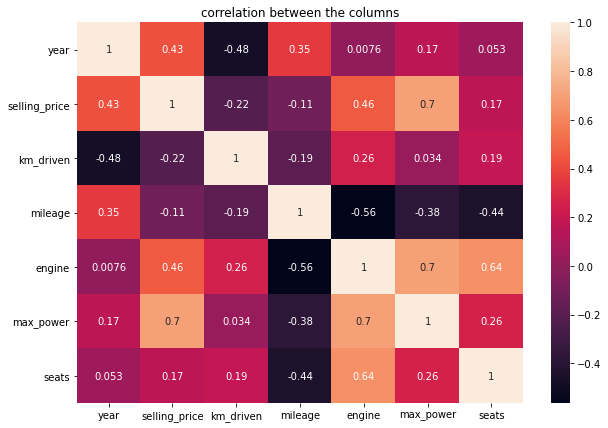

In [27]:
#correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(car_df.corr(),annot=True)
plt.title('correlation between the columns')
plt.show()

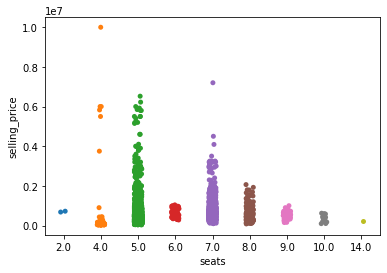

In [36]:
#correlation between selling_price and seats
sns.stripplot(data=car_df, x=car_df['seats'], y=car_df['selling_price']);

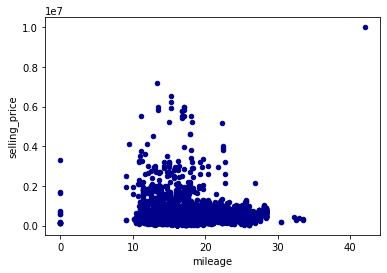

In [29]:
#correlation between selling price and mileage 
ax1 = car_df.plot.scatter(x='mileage',
                       y='selling_price',
                       c='DarkBlue')

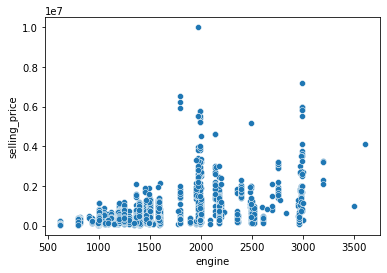

In [37]:
#correlation between engine and selling price
sns.scatterplot(data=car_df, x=car_df['engine'], y=car_df['selling_price']);

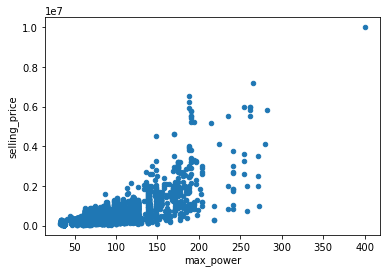

In [31]:
#correlation between maximum power and selling price
ax = car_df.plot.scatter(x='max_power', y='selling_price')

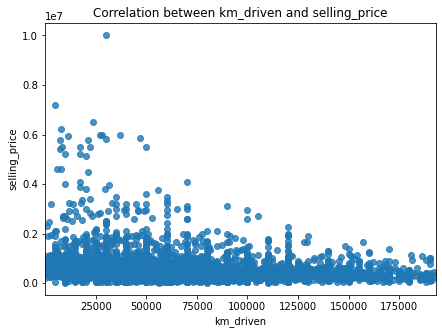

In [33]:
#Correlation between km_driven and selling_price
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between km_driven and selling_price')
sns.regplot(x='km_driven', y='selling_price',data=car_df);

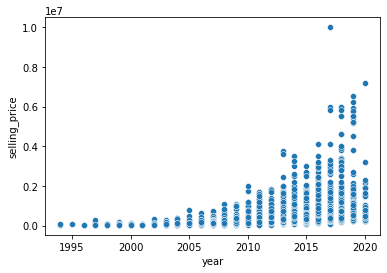

In [35]:
#correlation between model year and selling price
sns.scatterplot(data=car_df, x=car_df['year'], y=car_df['selling_price']);

In [ ]:
# Data Reduction
#

## 7. Implementing the Solution

In [38]:
#creting model variables
y = car_df['selling_price']
X_baseline = car_df['max_power']

In [44]:
#creating a baseline model
baseline_model = sm.OLS(y,sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     6196.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:31:48   Log-Likelihood:                -93512.
No. Observations:                6556   AIC:                         1.870e+05
Df Residuals:                    6554   BIC:                         1.870e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.856e+05   1.37e+04    -35.407      0.0

> Looking at the summary above,the regression line found was 

$$ \hat{sellingprice} = -4.856e+05 - 1.58e+04 maxpower $$
- 

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?